In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from helper import *

In [8]:
from connection import *

con = connect()

Connection Successful


Disorder and Task Type/Domain

In [ ]:
# took around 40 minutes to run, saved as a csv in data folder (disorder.csv)
query_1 = "disorder_action.sql"
data1 = SQL(query_1, con)

DatabaseError: Execution failed on sql: select sess.id, sess.patient_id, sess.task_type_id, sess.task_level, sess.completed_task_count, sess.accuracy, sess.latency, tp.domain_id, ps.condition_since, ps.birth_year, dis.disorder_id,
DATE(sess.start_time) AS start_time, sess.start_time AS start_time_min, DATE(sess.end_time) AS end_time, sess.end_time as end_time_min
from constant_therapy.sessions sess
join (
select domain_id, task_type_id, task_level from constant_therapy.task_progression
) tp on tp.task_type_id = sess.task_type_id and tp.task_level = sess.task_level
join (
select user_id, id, condition_since, age_group, birth_year, usertype, created_date, subscription_status from ct_customer.customers
) ps on ps.user_id = sess.patient_id
join (
select customer_id, disorder_id from ct_customer.customers_to_disorders
) dis on dis.customer_id = ps.id
where (sess.accuracy is not null) and (sess.latency is not null) and (ps.condition_since is not null) and (ps.birth_year is not null) and (ps.birth_year <> 0) and (ps.usertype = "patient");
(2013, 'Lost connection to MySQL server during query')
unable to rollback

2023-09-29 11:56:11,620| ERROR   | Could not establish connection from local ('127.0.0.1', 59400) to remote ('ctprod.cktdvwrzgusc.us-east-1.rds.amazonaws.com', 3306) side of the tunnel: open new channel ssh error: SSH session not active
2023-09-29 11:56:11,650| ERROR   | Could not establish connection from local ('127.0.0.1', 59400) to remote ('ctprod.cktdvwrzgusc.us-east-1.rds.amazonaws.com', 3306) side of the tunnel: open new channel ssh error: SSH session not active
2023-09-29 11:56:11,662| ERROR   | Could not establish connection from local ('127.0.0.1', 59400) to remote ('ctprod.cktdvwrzgusc.us-east-1.rds.amazonaws.com', 3306) side of the tunnel: open new channel ssh error: SSH session not active
2023-09-29 11:56:11,665| ERROR   | Could not establish connection from local ('127.0.0.1', 59400) to remote ('ctprod.cktdvwrzgusc.us-east-1.rds.amazonaws.com', 3306) side of the tunnel: open new channel ssh error: SSH session not active
2023-09-29 11:56:11,669| ERROR   | Could not establi

In [5]:
data1.nunique()

id                      7623691
patient_id               104743
task_type_id                 98
task_level                   12
completed_task_count        129
accuracy                   1386
domain_id                    14
condition_since              14
birth_year                  121
disorder_id                  12
start_time                 2185
start_time_min          7312972
end_time                   2184
end_time_min            7162785
dtype: int64

In [23]:
pd.unique(data1["disorder_id"])

array([   2,    3,    1, 9999,    4,    5,    8,    9,    6,    7,   10,
         11])

In [93]:
# data1.to_csv("disorder.csv")
data1 = pd.read_csv("data/disorder.csv")

In [94]:
data1.head()

,Unnamed: 0,id,patient_id,task_type_id,task_level,completed_task_count,accuracy,domain_id,condition_since,birth_year,disorder_id,start_time,start_time_min,end_time,end_time_min
0,0,635715,15666,20,1,3,0.875,1,1y,1964,2,2014-07-31,2014-07-31 00:38:38,2014-07-31,2014-07-31 00:39:24
1,1,635715,15666,20,1,3,0.875,1,1y,1964,3,2014-07-31,2014-07-31 00:38:38,2014-07-31,2014-07-31 00:39:24
2,2,639141,15796,20,1,2,0.032,1,5y,1950,2,2014-08-02,2014-08-02 21:11:37,2014-08-02,2014-08-02 21:11:40
3,3,639141,15796,20,1,2,0.032,1,5y,1950,3,2014-08-02,2014-08-02 21:11:37,2014-08-02,2014-08-02 21:11:40
4,4,659924,16441,20,1,3,1.000,1,6m,1959,2,2014-08-08,2014-08-08 16:21:14,2014-08-08,2014-08-08 16:21:54


In [9]:
disorder1 = data1[data1["disorder_id"] == 1]

<Axes: >

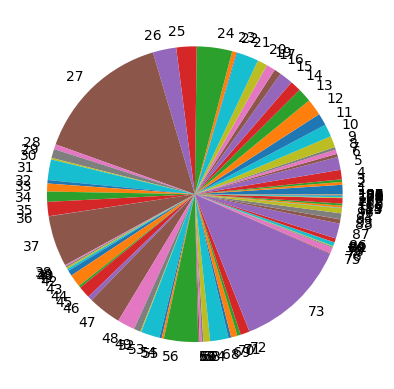

In [10]:
disorder1.groupby("task_type_id").size().plot.pie()

<Axes: >

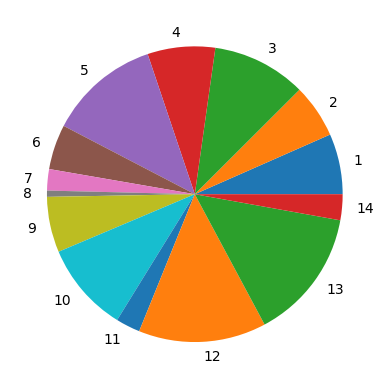

In [11]:
disorder1.groupby("domain_id").size().plot.pie()

<Axes: >

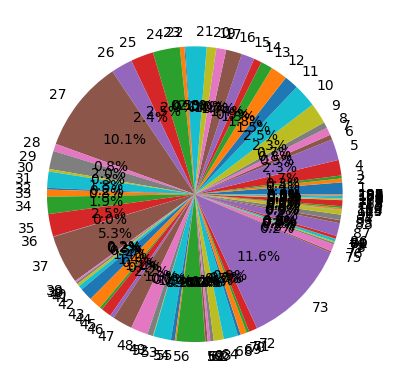

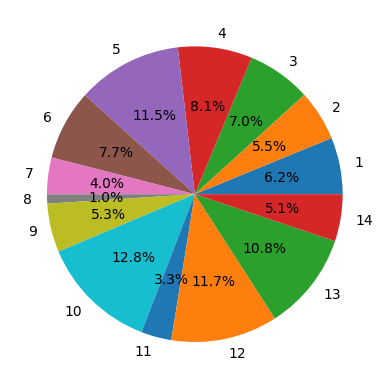

In [96]:
disorder3 = data1[data1["disorder_id"] == 3]
plt.figure(1)
disorder3.groupby("task_type_id").size().plot.pie(autopct='%1.1f%%')
plt.figure(2)
disorder3.groupby("domain_id").size().plot.pie(autopct='%1.1f%%')

<Axes: >

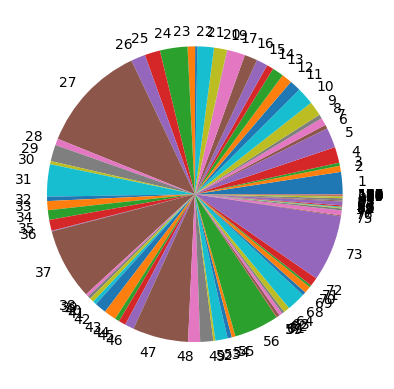

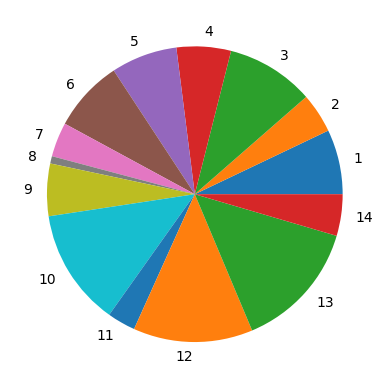

In [14]:
disorder4 = data1[data1["disorder_id"] == 4]
plt.figure(1)
disorder4.groupby("task_type_id").size().plot.pie()
plt.figure(2)
disorder4.groupby("domain_id").size().plot.pie()

<Axes: >

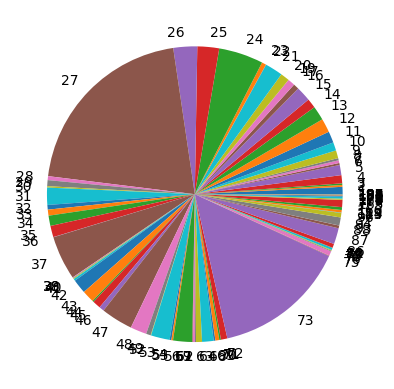

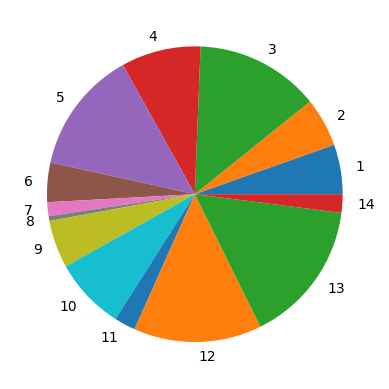

In [15]:
disorder5 = data1[data1["disorder_id"] == 5]
plt.figure(1)
disorder5.groupby("task_type_id").size().plot.pie()
plt.figure(2)
disorder5.groupby("domain_id").size().plot.pie()

<Axes: >

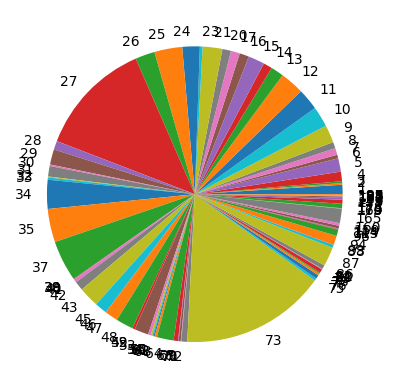

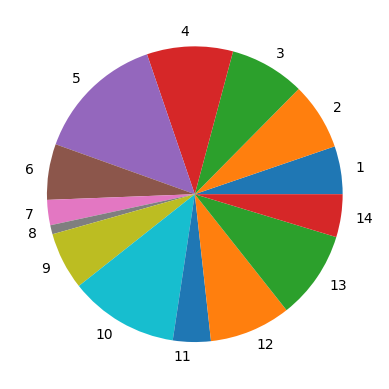

In [17]:
disorder6 = data1[data1["disorder_id"] == 6]
plt.figure(1)
disorder6.groupby("task_type_id").size().plot.pie()
plt.figure(2)
disorder6.groupby("domain_id").size().plot.pie()

<Axes: >

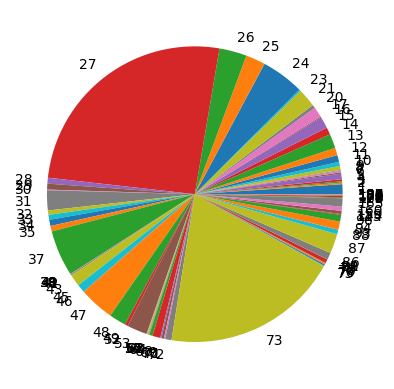

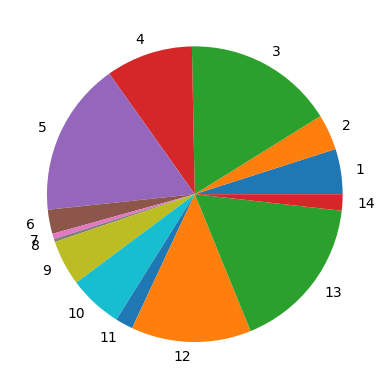

In [18]:
disorder7 = data1[data1["disorder_id"] == 7]
plt.figure(1)
disorder7.groupby("task_type_id").size().plot.pie()
plt.figure(2)
disorder7.groupby("domain_id").size().plot.pie()

<Axes: >

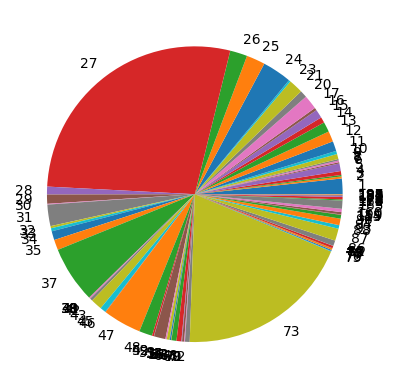

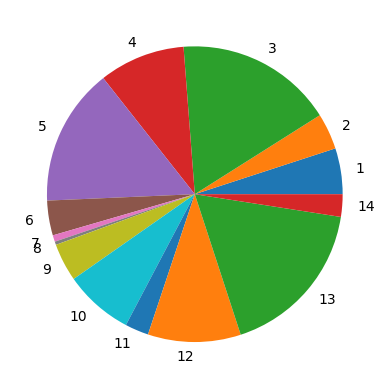

In [19]:
disorder8 = data1[data1["disorder_id"] == 8]
plt.figure(1)
disorder8.groupby("task_type_id").size().plot.pie()
plt.figure(2)
disorder8.groupby("domain_id").size().plot.pie()

<Axes: >

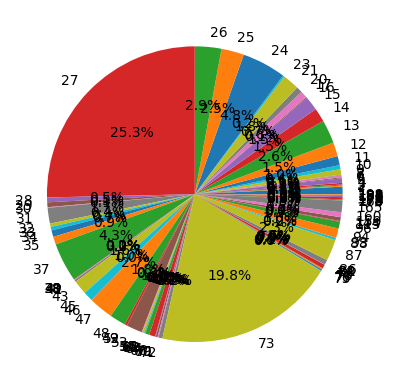

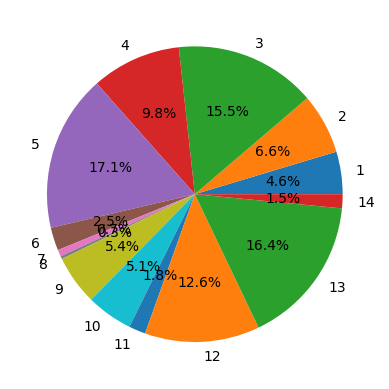

2023-05-17 17:28:49,225| ERROR   | Socket exception: Operation timed out (60)
2023-05-19 15:03:37,586| ERROR   | Could not establish connection from local ('192.168.1.223', 63441) to remote ('ctprod.cktdvwrzgusc.us-east-1.rds.amazonaws.com', 3306) side of the tunnel: open new channel ssh error: SSH session not active
2023-05-19 15:03:37,592| ERROR   | Could not establish connection from local ('192.168.1.223', 63441) to remote ('ctprod.cktdvwrzgusc.us-east-1.rds.amazonaws.com', 3306) side of the tunnel: open new channel ssh error: SSH session not active
2023-05-19 15:03:37,593| ERROR   | Could not establish connection from local ('192.168.1.223', 63441) to remote ('ctprod.cktdvwrzgusc.us-east-1.rds.amazonaws.com', 3306) side of the tunnel: open new channel ssh error: SSH session not active
2023-05-19 15:03:37,594| ERROR   | Could not establish connection from local ('192.168.1.223', 63441) to remote ('ctprod.cktdvwrzgusc.us-east-1.rds.amazonaws.com', 3306) side of the tunnel: open new 

In [ ]:
disorder9 = data1[data1["disorder_id"] == 9]
plt.figure(1)
disorder9.groupby("task_type_id").size().plot.pie(autopct='%1.1f%%')
plt.figure(2)
disorder9.groupby("domain_id").size().plot.pie(autopct='%1.1f%%')

<Axes: >

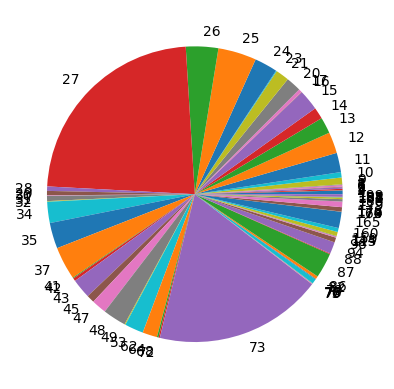

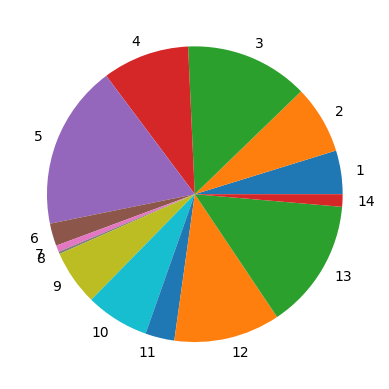

In [21]:
disorder10 = data1[data1["disorder_id"] == 10]
plt.figure(1)
disorder10.groupby("task_type_id").size().plot.pie()
plt.figure(2)
disorder10.groupby("domain_id").size().plot.pie()

<Axes: >

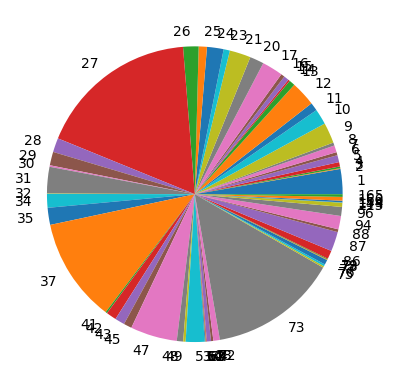

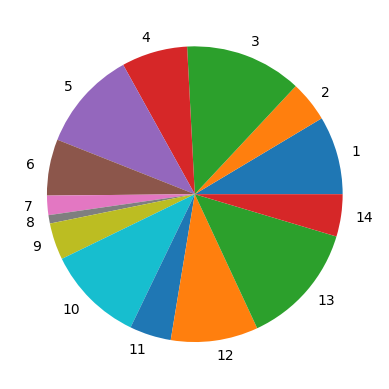

In [22]:
disorder11 = data1[data1["disorder_id"] == 11]
plt.figure(1)
disorder11.groupby("task_type_id").size().plot.pie()
plt.figure(2)
disorder11.groupby("domain_id").size().plot.pie()

<Axes: >

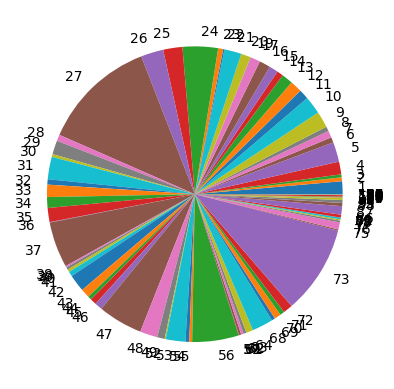

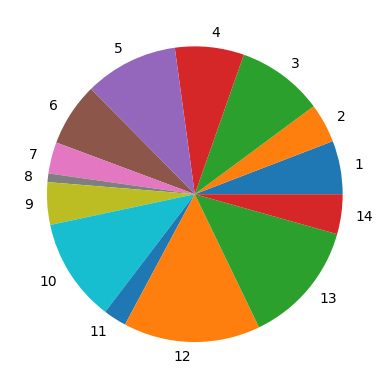

In [24]:
disorder9999 = data1[data1["disorder_id"] == 9999]
plt.figure(1)
disorder9999.groupby("task_type_id").size().plot.pie()
plt.figure(2)
disorder9999.groupby("domain_id").size().plot.pie()

Deficit and Task Type/Domain

In [13]:
query_2 = "select * from ct_customer.customers_to_deficits;"
data2 = SQL(query_2, con)

In [14]:
data2.head()

,customer_id,deficit_id,details
0,0,1,READ
1,0,2,WRIT
2,0,3,NAME
3,0,4,COMP
4,0,5,ATTN


In [15]:
data2.to_csv("data/deficit_list.csv")

In [16]:
customers_data = SQL("select * from ct_customer.customers;", con)

In [18]:
customers_data.to_csv("data/customers.csv")

In [19]:
customers_data.head()

,id,user_id,usertype,location,created_date,subscription_status,lead_source,lead_source_details,last_subscription_alert,signup_location,...,facility_name,setting,setting_details,whatpromptedyou,comments,first_payment_date,device_owner,caregiver_other,caregiver_relationship,referrer_id
0,10,10.0,patient,None,NaT,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,12,12.0,patient,None,NaT,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,13,13.0,patient,None,NaT,grandfathered,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,14,14.0,patient,None,NaT,grandfathered,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,19,19.0,clinician,"San Carlos, California",2012-07-01,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [23]:
deficit_list = data2.groupby(["customer_id"])["deficit_id"].apply(set).reset_index()
deficit_list.rename(columns={"customer_id": "id"}, inplace=True)
deficit_list.head()

,id,deficit_id
0,0,"{1, 2, 3, 4, 5, 6}"
1,2008,"{1, 2, 3, 999}"
2,2010,"{1, 2, 3}"
3,2011,"{1, 2, 3, 999}"
4,2036,"{1, 2, 3}"


In [27]:
customer_deficit = pd.merge(customers_data, deficit_list, on="id", how="inner")
customer_deficit = customer_deficit[["user_id", "deficit_id"]]
customer_deficit.rename(columns={"user_id": "patient_id"}, inplace=True)
customer_deficit.head()

,patient_id,deficit_id
0,2043.0,"{1, 2, 3}"
1,2055.0,"{1, 2, 4}"
2,2074.0,"{4, 6}"
3,2075.0,"{1, 3, 4, 5, 6, 8}"
4,2076.0,"{4, 5, 6}"


In [28]:
disorder = pd.read_csv("data/disorder.csv")
context_action = pd.merge(disorder, customer_deficit, on="patient_id", how="inner")
context_action.head()

,Unnamed: 0,id,patient_id,task_type_id,task_level,completed_task_count,accuracy,domain_id,condition_since,birth_year,disorder_id,start_time,start_time_min,end_time,end_time_min,deficit_id
0,0,635715,15666,20,1,3,0.875,1,1y,1964,2,2014-07-31,2014-07-31 00:38:38,2014-07-31,2014-07-31 00:39:24,"{1, 2, 3, 4, 8}"
1,1,635715,15666,20,1,3,0.875,1,1y,1964,3,2014-07-31,2014-07-31 00:38:38,2014-07-31,2014-07-31 00:39:24,"{1, 2, 3, 4, 8}"
2,21,695385,15666,20,1,5,0.800,1,1y,1964,2,2014-08-18,2014-08-18 22:03:20,2014-08-18,2014-08-18 22:05:21,"{1, 2, 3, 4, 8}"
3,22,695385,15666,20,1,5,0.800,1,1y,1964,3,2014-08-18,2014-08-18 22:03:20,2014-08-18,2014-08-18 22:05:21,"{1, 2, 3, 4, 8}"
4,25,705234,15666,20,1,5,0.850,1,1y,1964,2,2014-08-21,2014-08-21 17:51:23,2014-08-21,2014-08-21 17:52:40,"{1, 2, 3, 4, 8}"


In [29]:
context_action.to_csv("data/context_action.csv")

In [63]:
data2 = context_action.drop_duplicates(subset="id")
data2 = data2[["id", "task_type_id", "domain_id", "deficit_id"]]
data2 = data2.explode("deficit_id")
data2.head()

,id,task_type_id,domain_id,deficit_id
0,635715,20,1,1
0,635715,20,1,2
0,635715,20,1,3
0,635715,20,1,4
0,635715,20,1,8


In [64]:
pd.unique(data2["deficit_id"])

array([1, 2, 3, 4, 8, 6, 7, 5, 9999, 9, 10], dtype=object)

<Axes: >

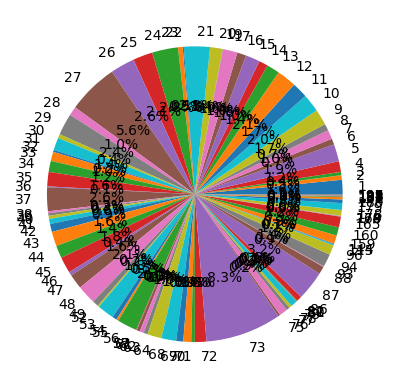

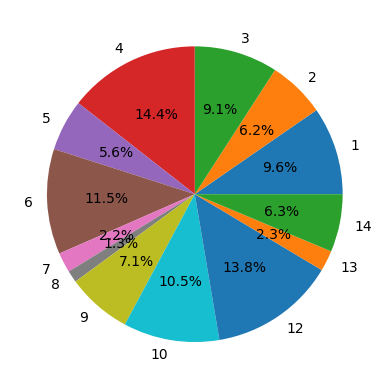

In [65]:
deficit1 = data2[data2["deficit_id"] == 1]
plt.figure()
deficit1.groupby("task_type_id").size().plot.pie(autopct='%1.1f%%')
plt.figure()
deficit1.groupby("domain_id").size().plot.pie(autopct='%1.1f%%')

<Axes: >

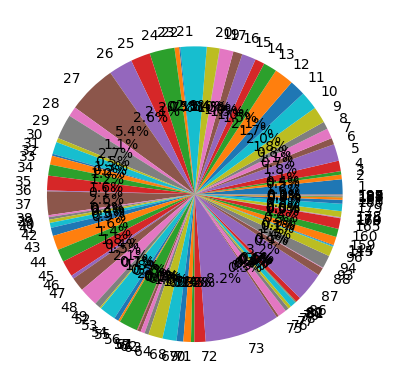

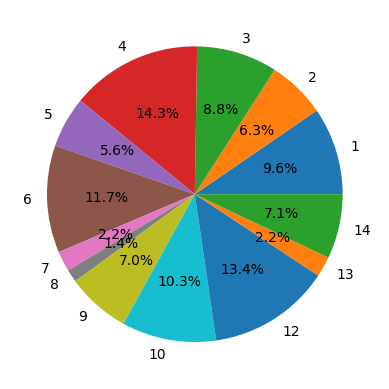

In [66]:
deficit2 = data2[data2["deficit_id"] == 2]
plt.figure()
deficit2.groupby("task_type_id").size().plot.pie(autopct='%1.1f%%')
plt.figure()
deficit2.groupby("domain_id").size().plot.pie(autopct='%1.1f%%')

<Axes: >

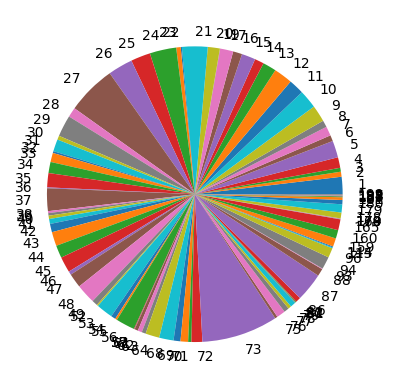

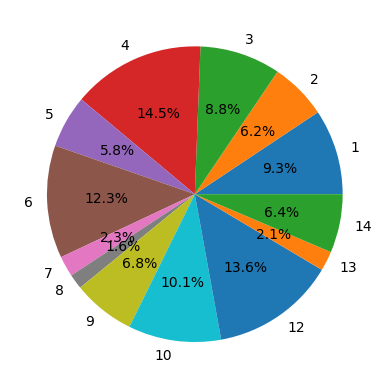

In [67]:
deficit3 = data2[data2["deficit_id"] == 3]
plt.figure()
deficit3.groupby("task_type_id").size().plot.pie()
plt.figure()
deficit3.groupby("domain_id").size().plot.pie(autopct='%1.1f%%')

<Axes: >

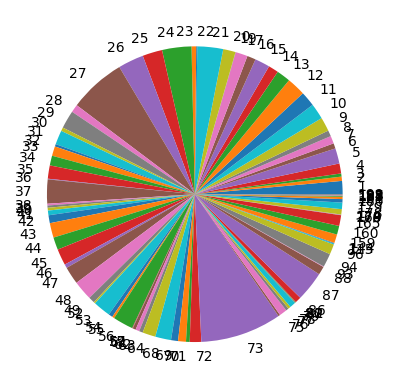

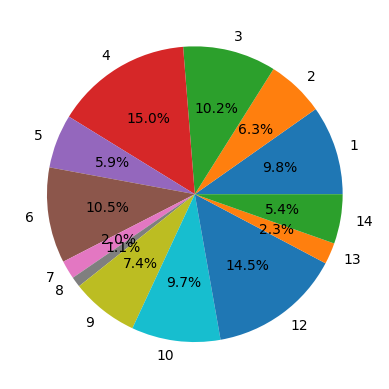

In [68]:
deficit4 = data2[data2["deficit_id"] == 4]
plt.figure()
deficit4.groupby("task_type_id").size().plot.pie()
plt.figure()
deficit4.groupby("domain_id").size().plot.pie(autopct='%1.1f%%')

<Axes: >

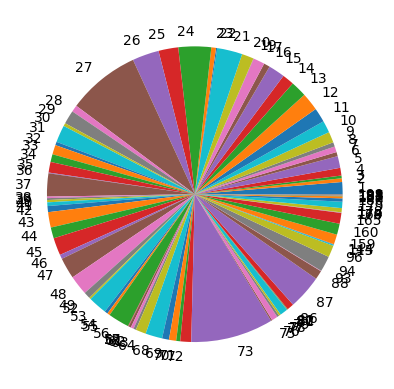

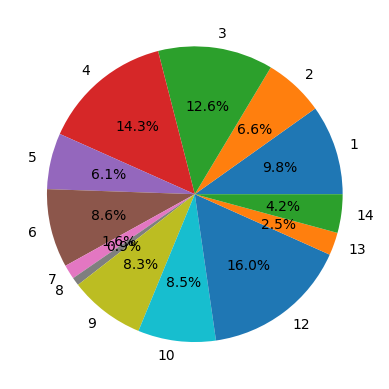

In [69]:
deficit5 = data2[data2["deficit_id"] == 5]
plt.figure()
deficit5.groupby("task_type_id").size().plot.pie()
plt.figure()
deficit5.groupby("domain_id").size().plot.pie(autopct='%1.1f%%')

<Axes: >

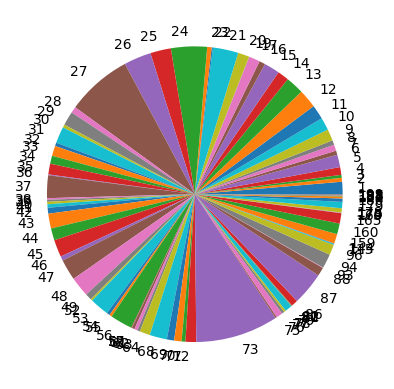

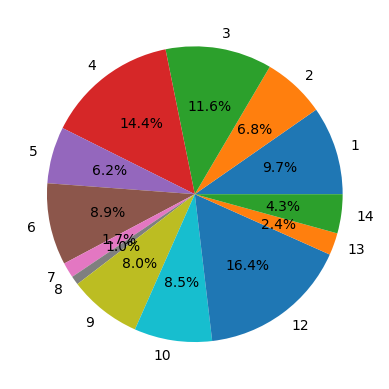

In [70]:
deficit6 = data2[data2["deficit_id"] == 6]
plt.figure()
deficit6.groupby("task_type_id").size().plot.pie()
plt.figure()
deficit6.groupby("domain_id").size().plot.pie(autopct='%1.1f%%')

<Axes: >

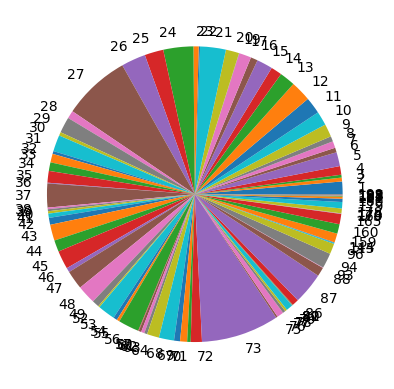

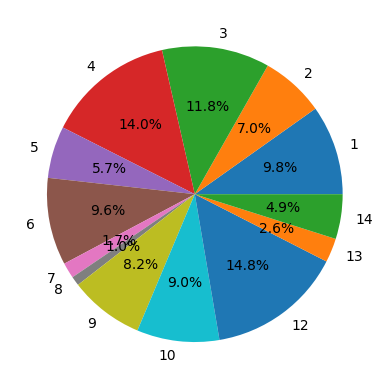

In [71]:
deficit7 = data2[data2["deficit_id"] == 7]
plt.figure()
deficit7.groupby("task_type_id").size().plot.pie()
plt.figure()
deficit7.groupby("domain_id").size().plot.pie(autopct='%1.1f%%')

<Axes: >

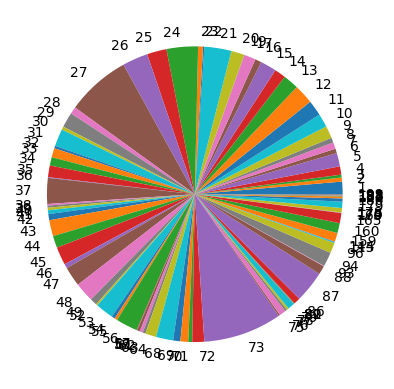

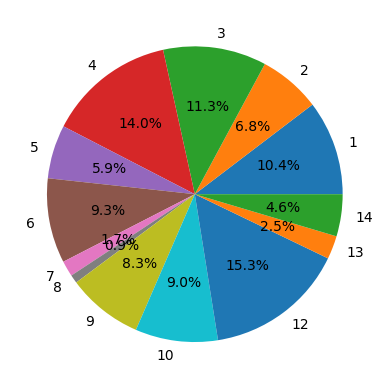

In [72]:
deficit8 = data2[data2["deficit_id"] == 8]
plt.figure()
deficit8.groupby("task_type_id").size().plot.pie()
plt.figure()
deficit8.groupby("domain_id").size().plot.pie(autopct='%1.1f%%')

<Axes: >

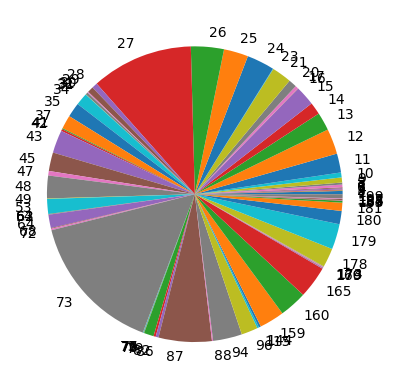

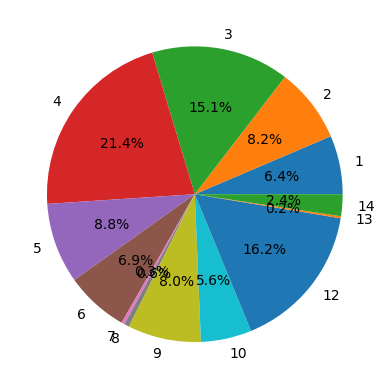

In [73]:
deficit9 = data2[data2["deficit_id"] == 9]
plt.figure()
deficit9.groupby("task_type_id").size().plot.pie()
plt.figure()
deficit9.groupby("domain_id").size().plot.pie(autopct='%1.1f%%')

<Axes: >

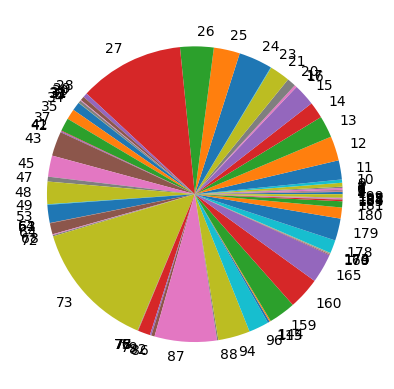

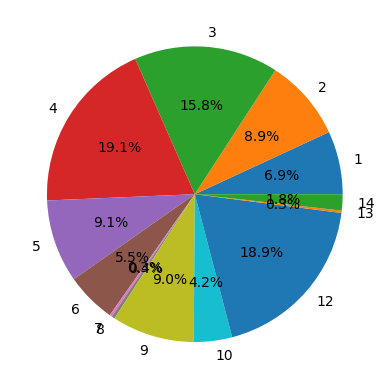

In [74]:
deficit10 = data2[data2["deficit_id"] == 10]
plt.figure()
deficit10.groupby("task_type_id").size().plot.pie()
plt.figure()
deficit10.groupby("domain_id").size().plot.pie(autopct='%1.1f%%')

<Axes: >

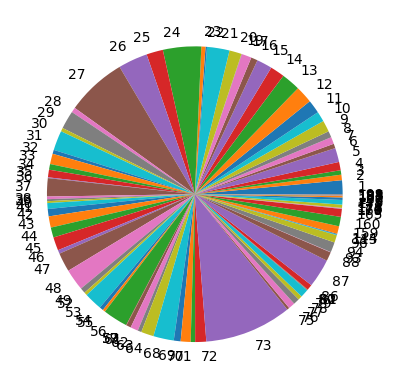

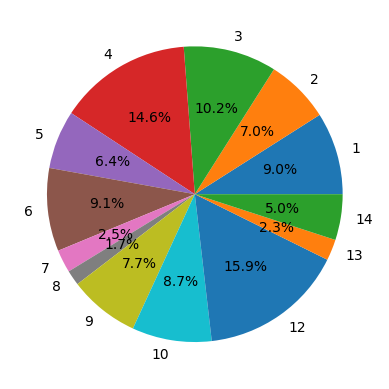

In [75]:
deficito = data2[data2["deficit_id"] == 9999]
plt.figure()
deficito.groupby("task_type_id").size().plot.pie()
plt.figure()
deficito.groupby("domain_id").size().plot.pie(autopct='%1.1f%%')

In [61]:
context_action.drop_duplicates(subset="patient_id")

,Unnamed: 0,id,patient_id,task_type_id,task_level,completed_task_count,accuracy,domain_id,condition_since,birth_year,disorder_id,start_time,start_time_min,end_time,end_time_min,deficit_id
0,0,635715,15666,20,1,3,0.875,1,1y,1964,2,2014-07-31,2014-07-31 00:38:38,2014-07-31,2014-07-31 00:39:24,"{1, 2, 3, 4, 8}"
2826,2,639141,15796,20,1,2,0.032,1,5y,1950,2,2014-08-02,2014-08-02 21:11:37,2014-08-02,2014-08-02 21:11:40,"{1, 2, 3, 4, 8}"
21108,4,659924,16441,20,1,3,1.000,1,6m,1959,2,2014-08-08,2014-08-08 16:21:14,2014-08-08,2014-08-08 16:21:54,"{1, 2, 3, 4}"
22833,5,668515,15974,20,1,3,0.959,1,6m,1936,2,2014-08-10,2014-08-10 15:09:56,2014-08-10,2014-08-10 15:11:04,"{1, 2, 3, 4}"
44061,13,678622,16982,20,1,3,1.000,1,10y,1960,2,2014-08-13,2014-08-13 15:13:25,2014-08-13,2014-08-13 15:14:11,"{1, 2, 3, 4, 8}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61860647,62400204,7355980,120239,29,5,1,1.000,14,6m,1950,3,2017-06-20,2017-06-20 17:36:20,NaN,NaN,"{8, 2, 6}"
61860651,62402296,8798733,144205,29,5,10,0.960,14,2y,1975,2,2017-10-24,2017-10-24 20:43:46,2017-10-25,2017-10-25 19:15:21,"{1, 2, 3, 4, 6}"
61860683,62471692,14061511,217018,7,5,10,0.908,14,6m,1943,3,2018-11-05,2018-11-05 15:52:25,2018-11-05,2018-11-05 16:08:50,{3}
61860707,62721712,19565141,324494,173,6,1,1.000,14,10y,1947,9,2019-08-26,2019-08-26 14:17:41,NaN,NaN,{6}


Overall

In [3]:
context_action = pd.read_csv("data/context_action.csv")

In [62]:
context_action.head()

,Unnamed: 0,id,patient_id,task_type_id,task_level,completed_task_count,accuracy,domain_id,condition_since,birth_year,disorder_id,start_time,start_time_min,end_time,end_time_min,deficit_id
0,0,635715,15666,20,1,3,0.875,1,1y,1964,2,2014-07-31,2014-07-31 00:38:38,2014-07-31,2014-07-31 00:39:24,"{1, 2, 3, 4, 8}"
1,1,635715,15666,20,1,3,0.875,1,1y,1964,3,2014-07-31,2014-07-31 00:38:38,2014-07-31,2014-07-31 00:39:24,"{1, 2, 3, 4, 8}"
2,21,695385,15666,20,1,5,0.800,1,1y,1964,2,2014-08-18,2014-08-18 22:03:20,2014-08-18,2014-08-18 22:05:21,"{1, 2, 3, 4, 8}"
3,22,695385,15666,20,1,5,0.800,1,1y,1964,3,2014-08-18,2014-08-18 22:03:20,2014-08-18,2014-08-18 22:05:21,"{1, 2, 3, 4, 8}"
4,25,705234,15666,20,1,5,0.850,1,1y,1964,2,2014-08-21,2014-08-21 17:51:23,2014-08-21,2014-08-21 17:52:40,"{1, 2, 3, 4, 8}"


In [78]:
context_action["patient_id"].nunique()

97754

In [89]:
pd.unique(context_action["disorder_id"])

array([   2,    3,    1, 9999,    4,    5,    8,    9,    6,    7,   10,
         11])

In [45]:
df = context_action.groupby(["patient_id"])["disorder_id"].apply(set).reset_index()
df

,patient_id,disorder_id
0,14189,{3}
1,14561,{2}
2,14683,"{2, 3}"
3,14685,{2}
4,14696,{2}
...,...,...
97749,415551,{9}
97750,415603,{2}
97751,415758,{2}
97752,415867,{1}


[Text(0, 0, '19865'),
 Text(0, 0, '40069'),
 Text(0, 0, '24578'),
 Text(0, 0, '2569'),
 Text(0, 0, '8287'),
 Text(0, 0, '5837'),
 Text(0, 0, '8905'),
 Text(0, 0, '11868'),
 Text(0, 0, '23389'),
 Text(0, 0, '1906'),
 Text(0, 0, '157'),
 Text(0, 0, '3735')]

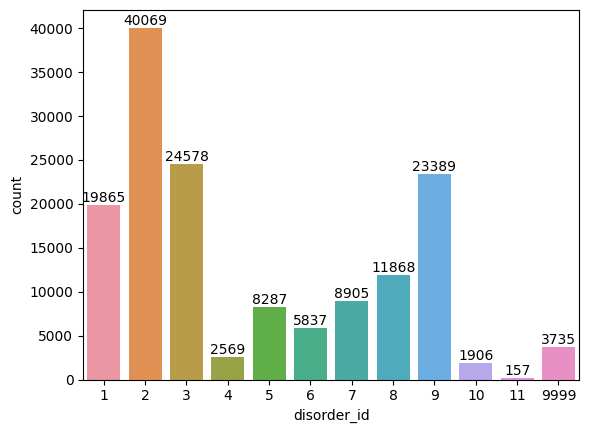

In [9]:
df = df.explode("disorder_id")
ax = sns.countplot(data=df, x="disorder_id")
ax.bar_label(ax.containers[0], label_type="edge")

In [41]:
def string_to_set(s):
    output = set()
    cur = ""
    for c in s:
        if c.isdigit():
            cur += c
        elif c == ",":
            output.add(cur)
        elif c == " ":
            cur = ""
    return output

[Text(0, 0, '54589'),
 Text(0, 0, '40506'),
 Text(0, 0, '45636'),
 Text(0, 0, '49523'),
 Text(0, 0, '36156'),
 Text(0, 0, '52741'),
 Text(0, 0, '37992'),
 Text(0, 0, '59684'),
 Text(0, 0, '4593'),
 Text(0, 0, '17531'),
 Text(0, 0, '121')]

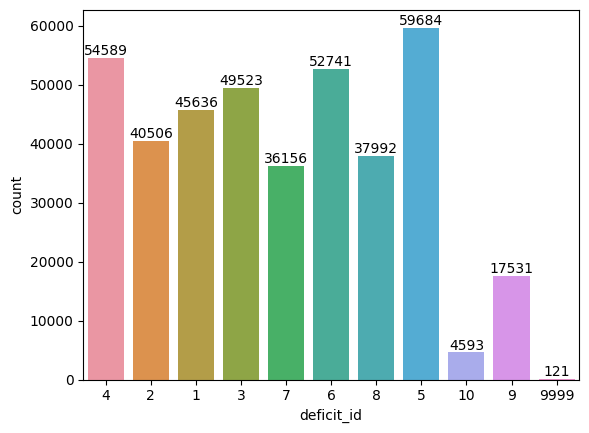

In [44]:
df = context_action[["patient_id", "deficit_id"]]
df = df.drop_duplicates(subset="patient_id")
df["deficit_id"] = df["deficit_id"].apply(string_to_set)
df = df.explode("deficit_id")
ax = sns.countplot(data=df, x="deficit_id")
ax.bar_label(ax.containers[0], label_type="edge")

In [64]:
patients_data = context_action.drop_duplicates(subset="patient_id")

In [65]:
patients_data["condition_since"] = patients_data["condition_since"].apply(time_convert)

/var/folders/vv/6vndbrvd7r1gc7xq3qqx8tfh0000gq/T/ipykernel_16275/2580197977.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  patients_data["condition_since"] = patients_data["condition_since"].apply(time_convert)


In [66]:
patients_data.head()

,Unnamed: 0.1,Unnamed: 0,id,patient_id,task_type_id,task_level,completed_task_count,accuracy,domain_id,condition_since,birth_year,disorder_id,start_time,start_time_min,end_time,end_time_min,deficit_id
0,0,0,635715,15666,20,1,3,0.875,1,12,1964,2,2014-07-31,2014-07-31 00:38:38,2014-07-31,2014-07-31 00:39:24,"{1, 2, 3, 4, 8}"
2826,2826,2,639141,15796,20,1,2,0.032,1,60,1950,2,2014-08-02,2014-08-02 21:11:37,2014-08-02,2014-08-02 21:11:40,"{1, 2, 3, 4, 8}"
21108,21108,4,659924,16441,20,1,3,1.000,1,6,1959,2,2014-08-08,2014-08-08 16:21:14,2014-08-08,2014-08-08 16:21:54,"{1, 2, 3, 4}"
22833,22833,5,668515,15974,20,1,3,0.959,1,6,1936,2,2014-08-10,2014-08-10 15:09:56,2014-08-10,2014-08-10 15:11:04,"{1, 2, 3, 4}"
44061,44061,13,678622,16982,20,1,3,1.000,1,120,1960,2,2014-08-13,2014-08-13 15:13:25,2014-08-13,2014-08-13 15:14:11,"{1, 2, 3, 4, 8}"


In [71]:
patients_data["age"] = 2023 - patients_data["birth_year"]
patients_data.drop(patients_data.columns[[0, 1]], axis=1, inplace=True)
patients_data.head()

/var/folders/vv/6vndbrvd7r1gc7xq3qqx8tfh0000gq/T/ipykernel_16275/4048146676.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  patients_data["age"] = 2023 - patients_data["birth_year"]
/var/folders/vv/6vndbrvd7r1gc7xq3qqx8tfh0000gq/T/ipykernel_16275/4048146676.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  patients_data.drop(patients_data.columns[[0, 1]], axis=1, inplace=True)


,id,patient_id,task_type_id,task_level,completed_task_count,accuracy,domain_id,condition_since,birth_year,start_time,start_time_min,end_time,end_time_min,deficit_id,age
0,635715,15666,20,1,3,0.875,1,12,1964,2014-07-31,2014-07-31 00:38:38,2014-07-31,2014-07-31 00:39:24,"{1, 2, 3, 4, 8}",59
2826,639141,15796,20,1,2,0.032,1,60,1950,2014-08-02,2014-08-02 21:11:37,2014-08-02,2014-08-02 21:11:40,"{1, 2, 3, 4, 8}",73
21108,659924,16441,20,1,3,1.000,1,6,1959,2014-08-08,2014-08-08 16:21:14,2014-08-08,2014-08-08 16:21:54,"{1, 2, 3, 4}",64
22833,668515,15974,20,1,3,0.959,1,6,1936,2014-08-10,2014-08-10 15:09:56,2014-08-10,2014-08-10 15:11:04,"{1, 2, 3, 4}",87
44061,678622,16982,20,1,3,1.000,1,120,1960,2014-08-13,2014-08-13 15:13:25,2014-08-13,2014-08-13 15:14:11,"{1, 2, 3, 4, 8}",63


<Axes: xlabel='age', ylabel='Count'>

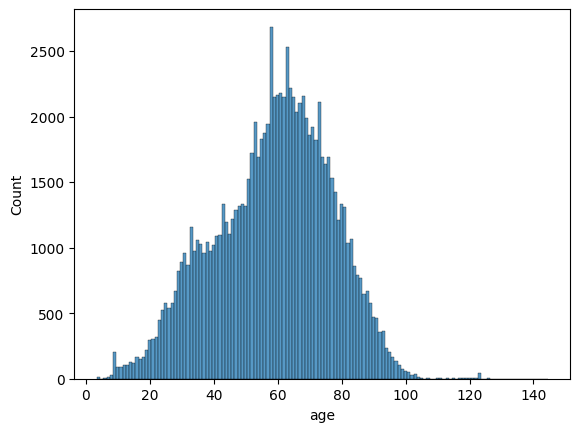

In [78]:
sns.histplot(data=patients_data, x="age", discrete=True)

<Axes: xlabel='condition_since', ylabel='Count'>

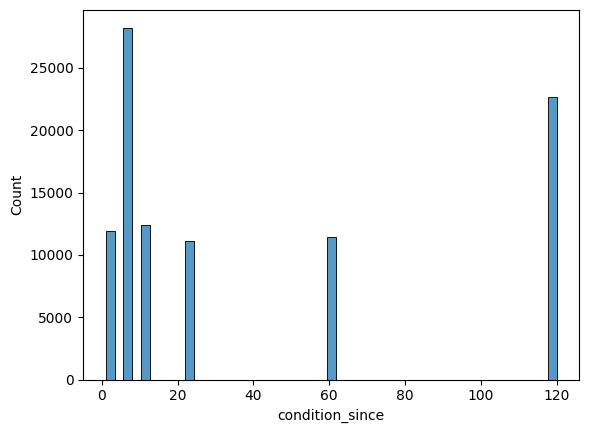

In [80]:
sns.histplot(data=patients_data, x="condition_since")

In [83]:
action_data = context_action.drop_duplicates(subset="id")
action_data.drop(action_data.columns[[0, 1]], axis=1, inplace=True)
action_data.head()

/var/folders/vv/6vndbrvd7r1gc7xq3qqx8tfh0000gq/T/ipykernel_16275/688939938.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  action_data.drop(action_data.columns[[0, 1]], axis=1, inplace=True)


,id,patient_id,task_type_id,task_level,completed_task_count,accuracy,domain_id,condition_since,birth_year,disorder_id,start_time,start_time_min,end_time,end_time_min,deficit_id
0,635715,15666,20,1,3,0.875,1,1y,1964,2,2014-07-31,2014-07-31 00:38:38,2014-07-31,2014-07-31 00:39:24,"{1, 2, 3, 4, 8}"
2,695385,15666,20,1,5,0.800,1,1y,1964,2,2014-08-18,2014-08-18 22:03:20,2014-08-18,2014-08-18 22:05:21,"{1, 2, 3, 4, 8}"
4,705234,15666,20,1,5,0.850,1,1y,1964,2,2014-08-21,2014-08-21 17:51:23,2014-08-21,2014-08-21 17:52:40,"{1, 2, 3, 4, 8}"
6,4929693,15666,20,1,5,0.800,1,1y,1964,2,2016-10-19,2016-10-19 20:47:01,2016-10-19,2016-10-19 20:48:29,"{1, 2, 3, 4, 8}"
32,5429562,15666,37,1,5,0.800,1,1y,1964,2,2016-12-13,2016-12-13 01:14:14,2016-12-13,2016-12-13 01:16:24,"{1, 2, 3, 4, 8}"


In [88]:
len(action_data)

7488017

In [89]:
action_data["completed_task_count"].sum()

53655339

Bad pipe message: %s [b'\x11\xaf\x01@V\x0cY\xb5p\xe26\x80\xa1Zv\t\xa0\x8c\x00\x01p\x00\x01\x00\x02\x00\x03\x00\x04\x00\x05\x00\x06\x00\x07\x00\x08\x00\t\x00\n\x00\x0b\x00\x0c\x00\r\x00\x0e\x00\x0f\x00']
Bad pipe message: %s [b'\x11\x00\x12\x00\x13\x00\x14\x00\x15\x00\x16\x00\x17\x00\x18']
Bad pipe message: %s [b" ~'t\x11\x06\x98\xac\x8e\x81\x91_E\xfa\xea@\xf3\xb4\x00\x01p\x00\x01\x00\x02\x00\x03\x00\x04\x00\x05\x00\x06\x00\x07\x00\x08\x00\t\x00\n\x00\x0b\x00\x0c\x00\r\x00\x0e\x00\x0f\x00\x10\x00\x11\x00\x12\x00\x13\x00\x14\x00\x15\x00\x16\x00"]
Bad pipe message: %s [b'\x18T\x96\xe5\x1d\xf1\xa7|\xa2\xf7\xc9\xbfu\x10\xaf^\x1fj\x00\x01p\x00\x01\x00\x02\x00\x03\x00\x04\x00\x05\x00\x06\x00\x07\x00\x08\x00\t\x00\n\x00\x0b\x00\x0c\x00\r\x00\x0e\x00\x0f\x00\x10\x00\x11\x00\x12\x00\x13\x00\x14\x00\x15\x00\x16\x00\x17\x00\x18\x00\x19\x00\x1a\x00\x1b\x00/\x000\x001\x002\x003\x004\x005\x006\x007\x008\x009\x00:\x00;\x00<\x00=\x00>\x00?\x00@\x00g\x00h\x00i\x00j\x00k\x00l\x00m\x00A\x00B\x00C\x00D\x00

<Axes: >

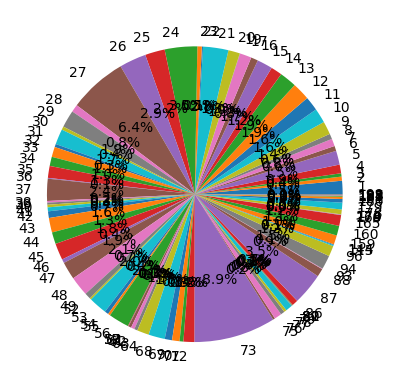

In [86]:
action_data.groupby("task_type_id").size().plot.pie(autopct='%1.1f%%')

<Axes: >

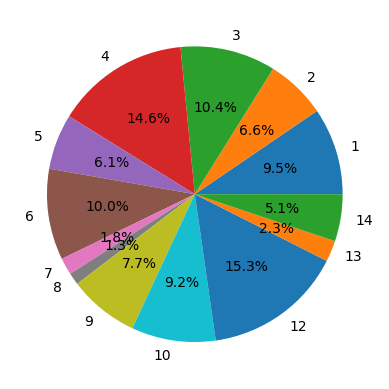

In [87]:
action_data.groupby("domain_id").size().plot.pie(autopct='%1.1f%%')

In [3]:
data = SQL("select * from constant_therapy.sessions where domain_scores is not null;", con)

In [4]:
data.head()

,id,type,schedule_id,patient_id,clinician_id,parent_id,start_time,end_time,duration,is_baseline,...,skipped_response_count,accuracy,latency,end_reason,parameters_json,aggregate_response_accuracy,score,max_score,domain_ids,domain_scores
0,531125,SCHEDULED,25729,9228,None,531124,2017-12-12 15:18:30,2017-12-12 15:20:24,123.0,0.0,...,0,0.85,24.64,tasks completed,"{""level"":""1"",""sessionType"":""SCHEDULED""}",None,None,None,1,0.4000
1,531126,SCHEDULED,25729,9228,None,531124,2017-12-12 15:22:07,2017-12-12 15:40:19,207.0,0.0,...,0,1.00,41.50,tasks completed,"{""level"":""3"",""sessionType"":""SCHEDULED""}",None,None,None,2,0.5100
2,531127,SCHEDULED,25729,9228,None,531124,2017-12-12 15:40:42,2017-12-12 15:42:47,128.0,0.0,...,0,0.95,25.76,tasks completed,"{""level"":""10"",""sessionType"":""SCHEDULED""}",None,None,None,"3,13","1.0000,0.5700"
3,531128,SCHEDULED,25729,9228,None,531124,2017-12-12 15:43:17,2017-12-12 15:43:54,62.0,0.0,...,0,0.87,20.75,tasks completed,"{""level"":""1"",""sessionType"":""SCHEDULED""}",None,None,None,12,0.3860
4,531130,SCHEDULED,25729,9228,None,531124,2017-12-12 15:46:37,2017-12-12 15:48:39,179.0,0.0,...,0,1.00,35.83,tasks completed,"{""level"":""3"",""sessionType"":""SCHEDULED""}",None,None,None,14,0.3070


In [ ]:
data.to_csv("data/domain_score.csv")

2023-05-22 17:28:32,406| ERROR   | Socket exception: Operation timed out (60)
2023-05-24 09:08:15,018| ERROR   | Could not establish connection from local ('192.168.1.223', 57373) to remote ('ctprod.cktdvwrzgusc.us-east-1.rds.amazonaws.com', 3306) side of the tunnel: open new channel ssh error: SSH session not active
2023-05-24 09:08:15,023| ERROR   | Could not establish connection from local ('192.168.1.223', 57373) to remote ('ctprod.cktdvwrzgusc.us-east-1.rds.amazonaws.com', 3306) side of the tunnel: open new channel ssh error: SSH session not active
2023-05-24 09:08:15,025| ERROR   | Could not establish connection from local ('192.168.1.223', 57373) to remote ('ctprod.cktdvwrzgusc.us-east-1.rds.amazonaws.com', 3306) side of the tunnel: open new channel ssh error: SSH session not active
2023-05-24 09:08:15,028| ERROR   | Could not establish connection from local ('192.168.1.223', 57373) to remote ('ctprod.cktdvwrzgusc.us-east-1.rds.amazonaws.com', 3306) side of the tunnel: open new 